### <b>추세선 그려보기</b>

* 특정한 데이터 사례가 주어졌을 때, <b>추세선(trend line)</b>을 그려보고 특성을 분석할 수 있다.
* 추세선은 다항 함수 형태로 표현할 수 있다.
* 하지만, 일반적으로 <b>1차 함수</b> 직선 형태가 가장 많이 사용된다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

#### <b>1. 장사꾼의 매출 예제</b>

* 장사꾼의 매출 예제를 확인해 보자.
* 어느 날, 한 장사꾼의 노동 시간과 매출액이 다음과 같았다.
* 하나의 <b>선형 함수</b> 형태의 <b>추세선</b>을 예측하여 노동 시간에 따른 매출을 예측해 보자.
  * <b>7시간</b>을 일 했을 때 매출은 얼마일까?
  * <b>9시간</b>을 일 했을 때 매출은 얼마일까?

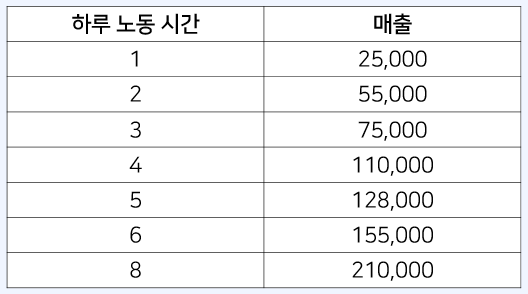

In [ ]:
X = [1, 2, 3, 4, 5, 6, 8]
y = [25000, 55000, 75000, 110000, 128000, 155000, 210000]

* 매출 데이터를 그래프로 표현해 보자.
* <b>입력(노동 시간)</b>과 <b>출력(매출)</b>이 <b>선형 함수(일차 함수)</b> 형태를 가진다.

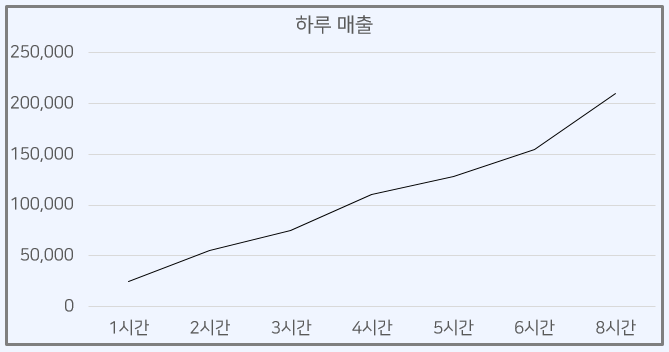

* <b>선형 함수</b> 모델을 가정하므로, 다음과 같이 모델을 정의할 수 있다.
* 이제 우리의 모델($W$와 $b$)을 수정해 나가면서 가장 합리적인 식을 찾아낼 수 있다.
* <b>가설 함수</b>: $f(x)=Wx+b$

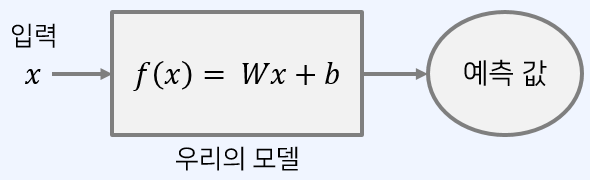

* 예를 들어 현재의 $W$가 10,000이고, $b$가 5,000이라고 해보자.

In [ ]:
class F():
    def __init__(self, W, b):
        self.W = W
        self.b = b

    def forward(self, x):
        prediction = self.W * x + b
        return prediction


W = 10000
b = 5000
model = F(W, b)
print(f"5시간 일했을 때 매출: {model.forward(5)}원")

5시간 일했을 때 매출: 55000원


* 현재 우리의 모델이 있을 때, 모델이 얼마나 잘못되었는지 평가하는 방법이 필요하다.
  * <b>비용(cost)</b>: 우리의 모델이 뱉은 답이 실제 정답과 얼마나 다른지 수치화한 것
* 선형 회귀 문제에서는 <b>평균 제곱 오차(mean squared error)</b>를 이용할 수 있다.
  * 모든 데이터에 대한 실제 값에서 예상 값을 뺀 것의 제곱의 합으로 비용을 계산한다.
* 따라서 다음 식을 최소화하는 파라미터 ($W$, $b$)를 찾는 것이 목표다.
  * 이를 <b>최소제곱법(minimum squared method)<b>라고도 한다.

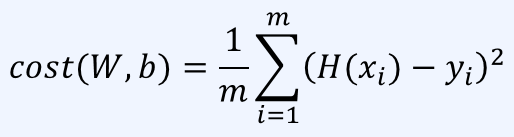

In [ ]:
def cost(prediction, y):
    result = 0
    for i in range(len(prediction)):
        result += (prediction[i] - y[i]) ** 2
    return result / len(prediction)

X_train = [1, 2, 3, 4, 5, 6, 8]
y_train = [25000, 55000, 75000, 110000, 128000, 155000, 210000]

X_test = [4.5, 6.5, 7, 9]
y_test = [117000, 182000, 190000, 221500]

print("[ 모델 예시 1 ]")
W = 10000
b = 5000
model = F(W, b)

prediction = [model.forward(x) for x in X_test]
print(f"비용: {cost(prediction, y_test):.2f}")

print("[ 모델 예시 2 ]")
W = 30000
b = 5000
model = F(W, b)

prediction = [model.forward(x) for x in X_test]
print(f"비용: {cost(prediction, y_test):.2f}")

[ 모델 예시 1 ]
비용: 11565062500.00
[ 모델 예시 2 ]
비용: 1085062500.00


#### <b>사이킷런(Scikit-Learn) 예시</b>

* 사이킷런의 <b>선형 회귀(linear regression)</b> 라이브러리를 이용해 <b>1차 함수</b> 형태의 추세선을 그릴 수 있다.
  * $f(x) = Wx$
* <b>Reference</b>: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [ ]:
X_train = [[1], [2], [3], [4], [5], [6], [8]]
y_train = [25000, 55000, 75000, 110000, 128000, 155000, 210000]

X_test = [[4.5], [6.5], [7], [9]]
y_test = [117000, 182000, 190000, 221500]

# 선형 회귀(linear regression) 모델 학습 수행
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

# 학습 결과 출력
print(f"Coefficients: {regressor.coef_}")
print(f"Bias: {regressor.intercept_}")
y_pred = regressor.predict(X_test)
print(f"예측 결과: {y_pred}")
print(f"MSE (Mean Squared Error): {mean_squared_error(y_test, y_pred)}")

Coefficients: [26098.36065574]
Bias: 163.93442622947623
예측 결과: [117606.55737705 169803.27868852 182852.45901639 235049.18032787]
MSE (Mean Squared Error): 95948888.06772393


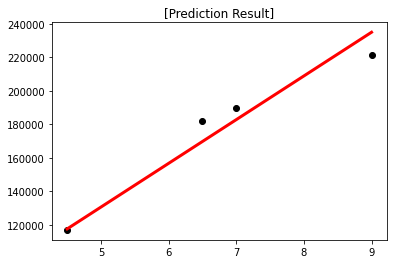

In [ ]:
plt.title("[Prediction Result]")
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.show()

#### <b>2. 당뇨병(Diabetes) 데이터 세트 예제</b>

* <b>사이킷런(Scikit-Learn)</b>에서 기본적으로 제공하는 <b>기계 학습 라이브러리</b>다.
* <b>load_diabetes</b>를 이용하여 <b>당뇨병(diabetes)</b> 환자 데이터를 사용할 수 있다.
* <b>입력</b> 데이터는 10차원의 데이터이며, <b>출력</b> 데이터는 <b>[25, 346]</b> 구간의 정수 값을 보인다.
* <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
# 당뇨병 데이터 세트 불러오기
diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target
print(f"입력 데이터 형식: {X.shape}")
print(f"출력 데이터 형식: {y.shape}")

# 각 입력 데이터의 특징(feature) 값 출력
print("[ 전체 특징 살펴보기 ]")
for i, feature_name in enumerate(diabetes.feature_names):
    print(f"특징 {i + 1}: {feature_name}")

# 단순히 BMI 지수만 이용해 예측하기
X = X[:, np.newaxis, 2]

# 20개를 제외한 나머지는 학습 데이터로 사용
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# 선형 회귀(linear regression) 모델 학습 수행
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

# 학습 결과 출력
print(f"Coefficients: {regressor.coef_}")
print(f"Bias: {regressor.intercept_}")
y_pred = regressor.predict(X_test)
print(f"MSE (Mean Squared Error): {mean_squared_error(y_test, y_pred)}")

입력 데이터 형식: (442, 10)
출력 데이터 형식: (442,)
[ 전체 특징 살펴보기 ]
특징 1: age
특징 2: sex
특징 3: bmi
특징 4: bp
특징 5: s1
특징 6: s2
특징 7: s3
특징 8: s4
특징 9: s5
특징 10: s6
Coefficients: [938.23786125]
Bias: 152.91886182616167
MSE (Mean Squared Error): 2548.0723987259694


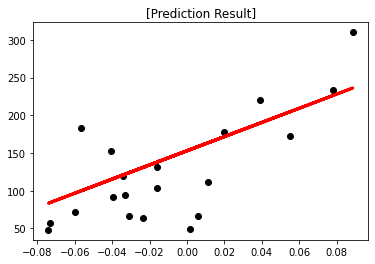

In [ ]:
plt.title("[Prediction Result]")
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.show()